In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import kruskal

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('current_df.csv')
df

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,antigen_score,probable_type,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,0.8209,ANTIGEN,483.928281,0.072916,0.568330,147.356275,NaN,NaN,NaN
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,0.3271,NON-ANTIGEN,470.400594,0.108789,0.082300,143.155747,NaN,NaN,NaN
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,0.4642,NON-ANTIGEN,469.095955,0.039136,0.322850,142.829555,NaN,NaN,NaN
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,0.0646,NON-ANTIGEN,460.323932,0.300376,0.145160,142.170765,NaN,NaN,NaN
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,0.0589,NON-ANTIGEN,469.770542,0.412814,-0.116125,141.937607,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1686,HLA-A*02:06,FQFCNDPFL,4.26,P0DTC2,15.422537,0.029662,3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.05737,-0.2493,NON-ANTIGEN,9.841269,0.029662,-0.095965,5.926557,NaN,NaN,NaN
1687,1687,HLA-A*02:01,GLMWLSYFI,3.98,P0DTC5,14.416746,0.004824,3,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.06464,0.2537,NON-ANTIGEN,9.198373,0.004824,0.159170,5.807745,NaN,NaN,NaN
1688,1688,HLA-A*68:02,DISGINASV,10.18,P0DTC2,20.572063,0.073331,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.04027,0.4155,NON-ANTIGEN,15.376032,0.073331,0.227885,5.688508,NaN,NaN,NaN
1689,1689,HLA-A*02:03,LLFNKVTLA,3.66,P0DTC2,12.718799,0.076986,3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.11337,0.6150,ANTIGEN,8.189400,0.076986,0.250815,5.539763,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1691 non-null   int64  
 1   allele                      1691 non-null   object 
 2   peptide                     1691 non-null   object 
 3   iedb_aff                    1691 non-null   float64
 4   protein_id                  1691 non-null   object 
 5   mhcflurry_aff               1691 non-null   float64
 6   mhcflurry_processing_score  1691 non-null   float64
 7   Number of Binding Alleles   1691 non-null   int64  
 8   protein_sequence            1691 non-null   object 
 9   immunogenicity_score        1691 non-null   float64
 10  antigen_score               1691 non-null   float64
 11  probable_type               1691 non-null   object 
 12  aff_score                   1691 non-null   float64
 13  pro_score                   1691 

In [4]:
df.isnull().sum()

Unnamed: 0                       0
allele                           0
peptide                          0
iedb_aff                         0
protein_id                       0
mhcflurry_aff                    0
mhcflurry_processing_score       0
Number of Binding Alleles        0
protein_sequence                 0
immunogenicity_score             0
antigen_score                    0
probable_type                    0
aff_score                        0
pro_score                        0
imm_score                        0
rank                             0
bcell_assays                  1684
tcell_assays                  1515
mch_assays                    1691
dtype: int64

In [6]:
df['allele'].unique()

array(['HLA-A*02:06', 'HLA-A*01:01', 'HLA-A*30:02', 'HLA-A*11:01',
       'HLA-B*15:01', 'HLA-B*07:02', 'HLA-B*35:01', 'HLA-A*68:01',
       'HLA-A*32:01', 'HLA-A*23:01', 'HLA-B*08:01', 'HLA-A*03:01',
       'HLA-A*02:03', 'HLA-B*58:01', 'HLA-A*26:01', 'HLA-A*68:02',
       'HLA-A*02:01', 'HLA-B*40:01', 'HLA-B*57:01', 'HLA-B*53:01',
       'HLA-A*31:01', 'HLA-A*24:02', 'HLA-A*33:01', 'HLA-A*30:01',
       'HLA-B*44:02', 'HLA-B*44:03', 'HLA-B*51:01'], dtype=object)

In [8]:
len(df['allele'].unique())

27

There are 27 unique alleles

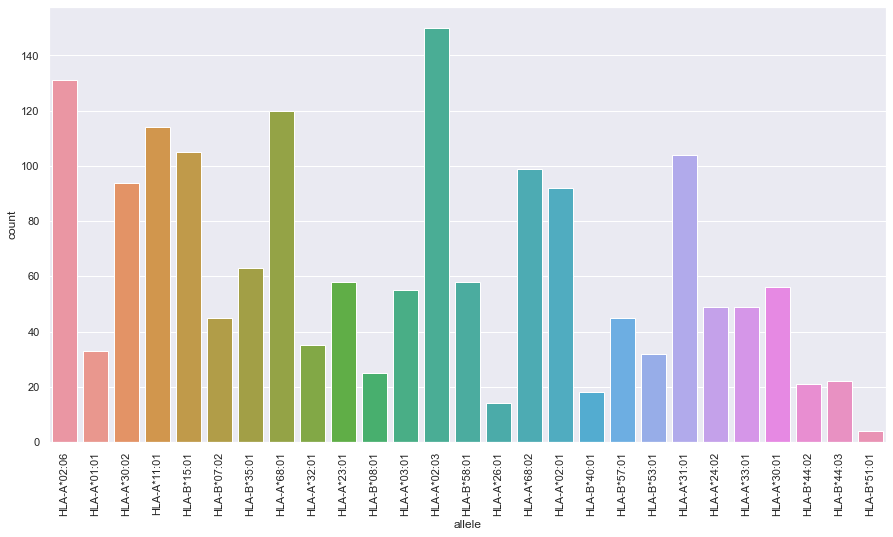

In [7]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'allele', data = df)
plt.xticks(rotation = 90)
plt.show()

HLA-A-02:03, HLA-A-02:06, HLA-A-68:01, HLA-A-11:01, HLA-B-15:01, HLA-A-31:01, HLA-A-68:02, HLA-A-02:01, HLA-A-30:02 are some of the most frequent alleles 

In [10]:
len(df['peptide'].unique())

834

There are 834 unique peptides

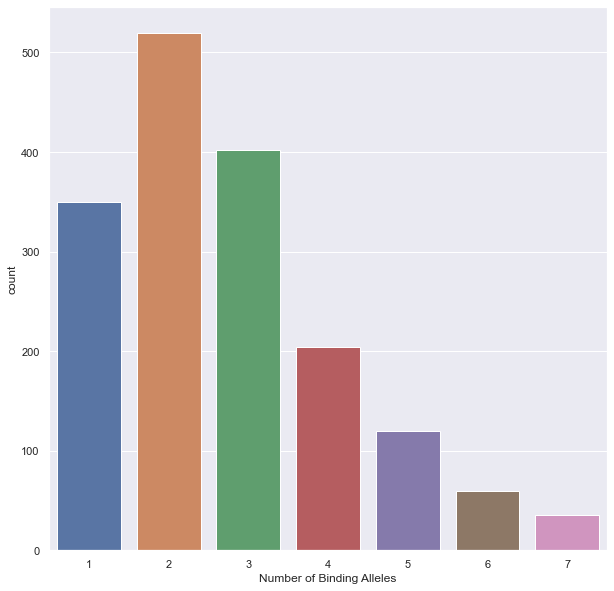

In [54]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Number of Binding Alleles', data = df)
plt.show()

Most of the peptides have 1 or 2 or 3 binding alleles. Peptides from Belyntic have max 2, 3 or 4 binding alleles

In [3]:
df['protein_sequence'].unique()

array(['MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDHSSSSDNIALLVQ',
       'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSF

In [3]:
num_features = ['iedb_aff', 'mhcflurry_aff', 'mhcflurry_processing_score', 'immunogenicity_score', 'antigen_score',
               'aff_score', 'pro_score', 'imm_score', 'rank']

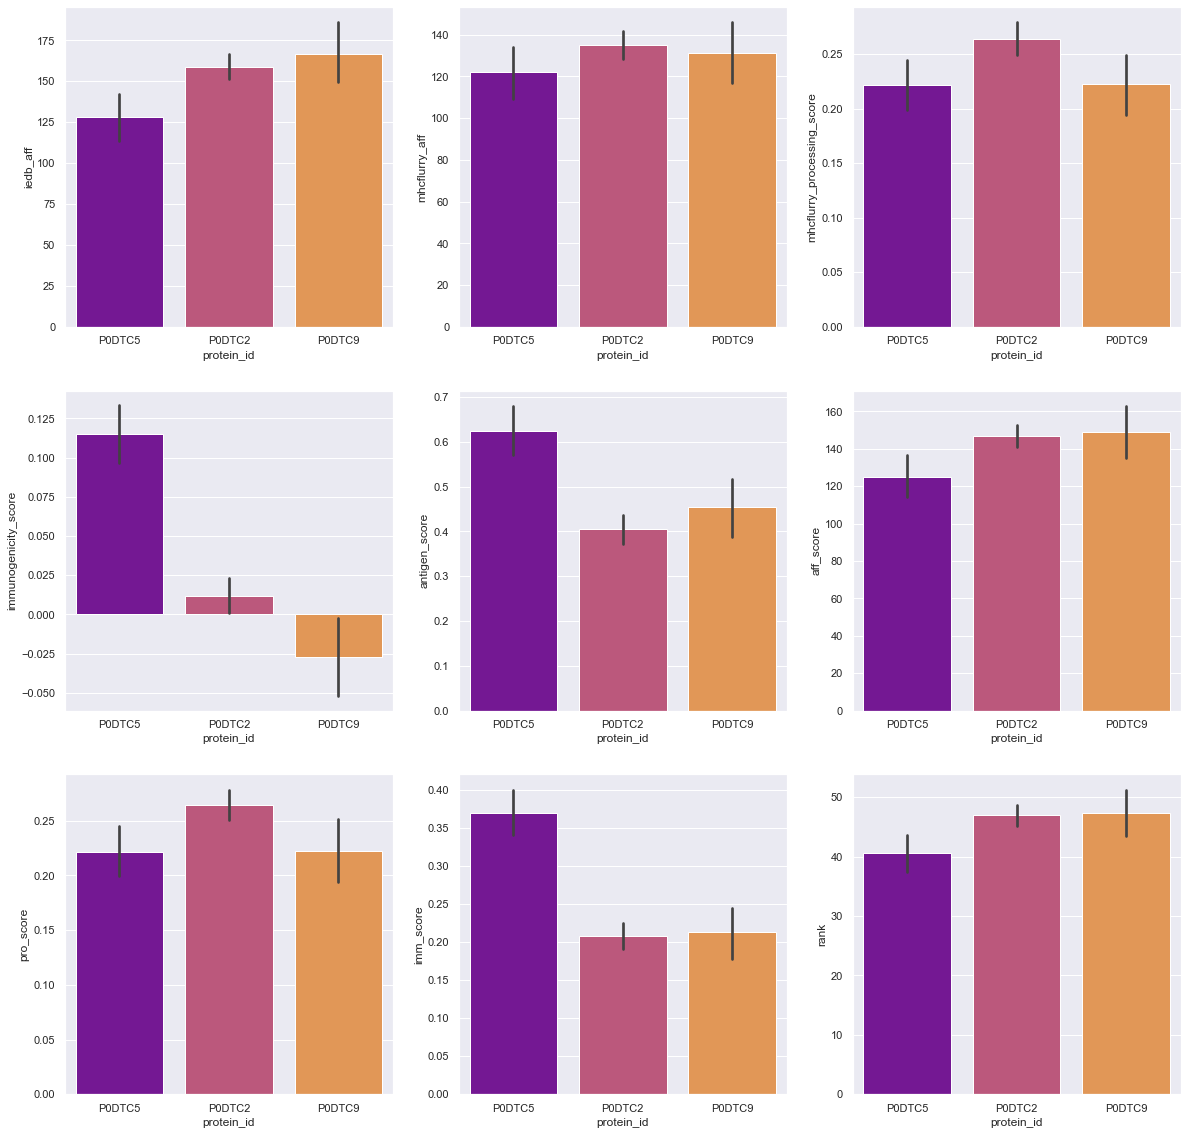

In [9]:
fig, axes = plt.subplots(3,3, figsize = (20, 20)) 

for param, ax in zip(num_features, axes.flatten()):
    sns.barplot(x ='protein_id', y =param, data = df,
            palette ='plasma', ax = ax)

P0DTC5 has maximum imm_score. P0DTC2 has maximum pro_score. P0DTC2 & P0DTC9 has almost equal aff_score higher than P0DTC5. The rank for  P0DTC2 & P0DTC9 is higher than P0DTC5.

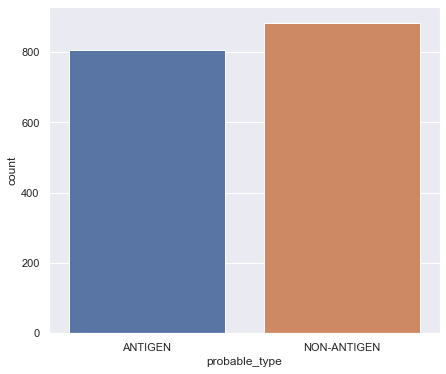

In [53]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'probable_type', data = df)
plt.show()

There are more non-antigens than antigens

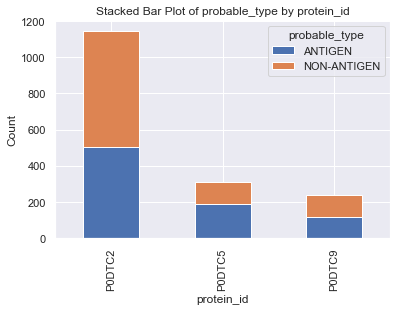

In [11]:
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

PODTC2 gives maximum peptide sequences but most are non-antigens

# Run this cell to calculate the length of the peptides

In [3]:
def get_len(peptide_seq):
    return len(peptide_seq)

In [4]:
df['Length_of_peptides'] = df['peptide'].apply(get_len)
df.head()

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,antigen_score,probable_type,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Length_of_peptides
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,0.8209,ANTIGEN,483.928281,0.072916,0.568330,147.356275,NaN,NaN,NaN,9
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,0.3271,NON-ANTIGEN,470.400594,0.108789,0.082300,143.155747,NaN,NaN,NaN,10
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,0.4642,NON-ANTIGEN,469.095955,0.039136,0.322850,142.829555,NaN,NaN,NaN,9
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,0.0646,NON-ANTIGEN,460.323932,0.300376,0.145160,142.170765,NaN,NaN,NaN,9
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,0.0589,NON-ANTIGEN,469.770542,0.412814,-0.116125,141.937607,NaN,NaN,NaN,8


<AxesSubplot:xlabel='Length_of_peptides', ylabel='count'>

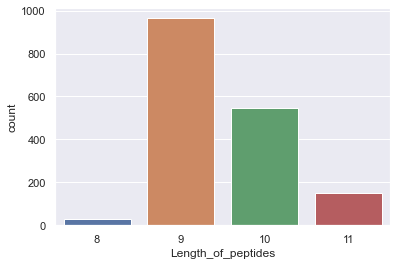

In [8]:
sns.countplot(x = 'Length_of_peptides', data = df)

Most of the peptides have length 9

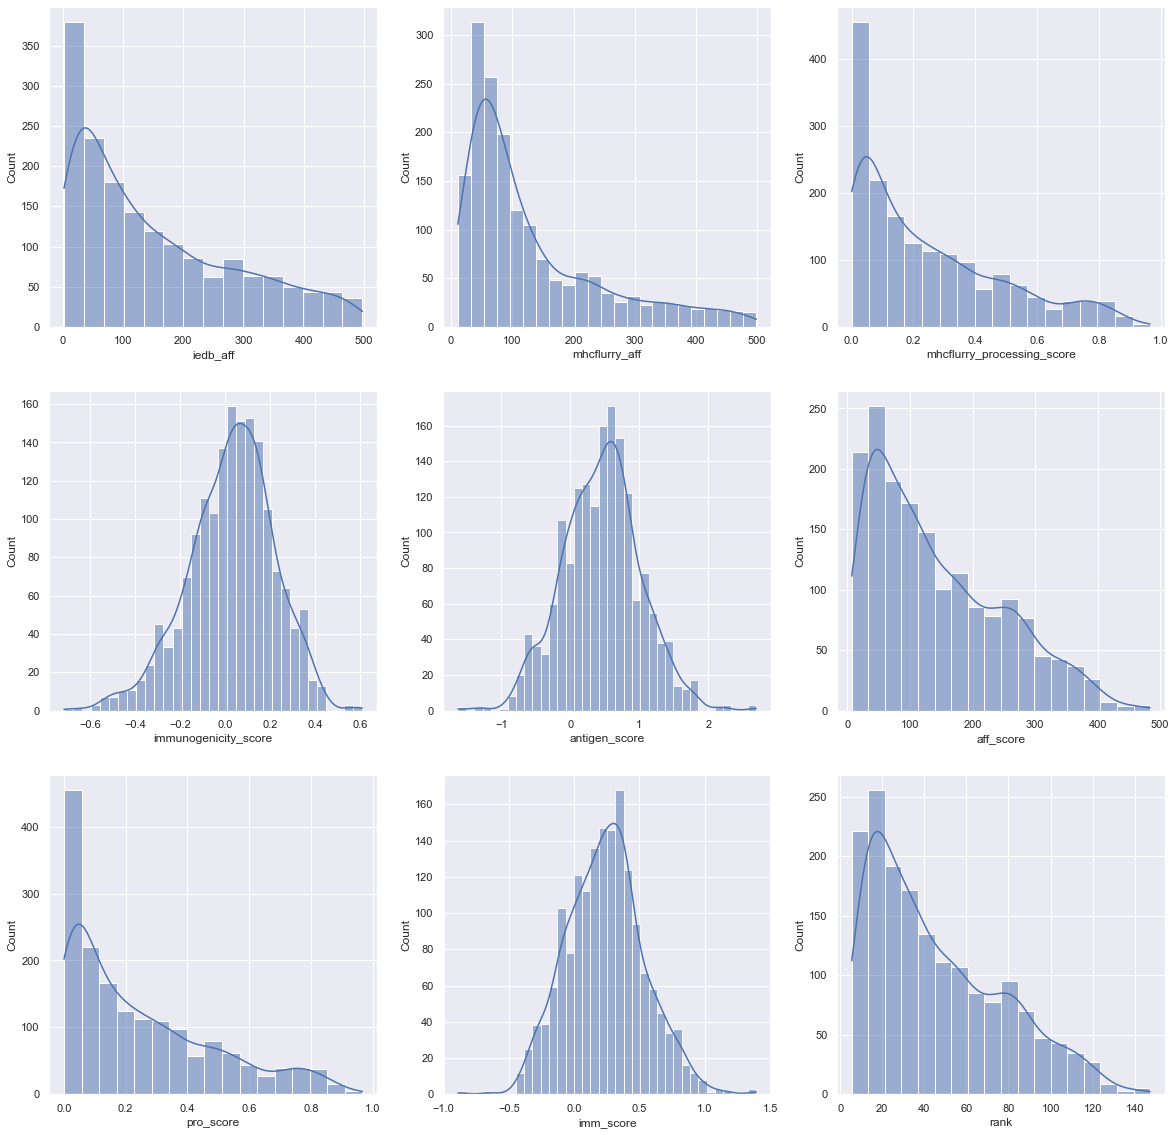

In [56]:
fig, axes = plt.subplots(3,3, figsize = (20, 20)) 

for param, ax in zip(num_features, axes.flatten()):
    sns.histplot(data=df, x=param, kde=True, ax = ax)
   

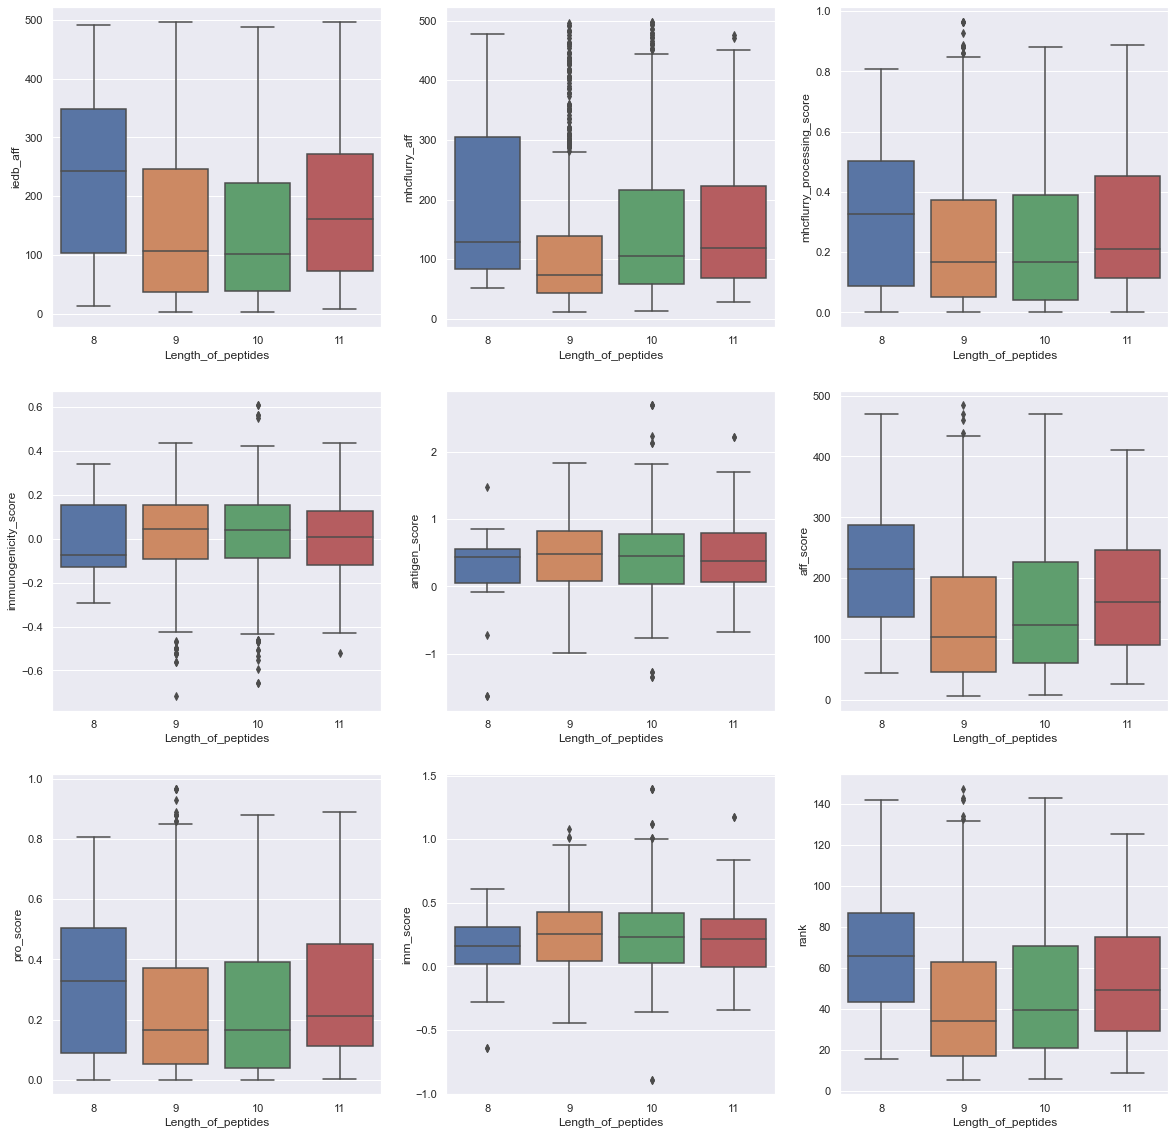

In [26]:
fig, axes = plt.subplots(3,3, figsize = (20, 20)) 

for param, ax in zip(num_features, axes.flatten()):
    sns.boxplot(data=df, x='Length_of_peptides', y=param, ax = ax)

Iedb_aff & mhcflurry aff_scores are higher for  peptides with length 8.
mhcflurry_processing_Score & pro_score is higher for peptides of length 8 & 11.
The antigen score & imm_score asre much lower for peptides of length 8.
Rank is much higher for peptides of length 8.


<AxesSubplot:>

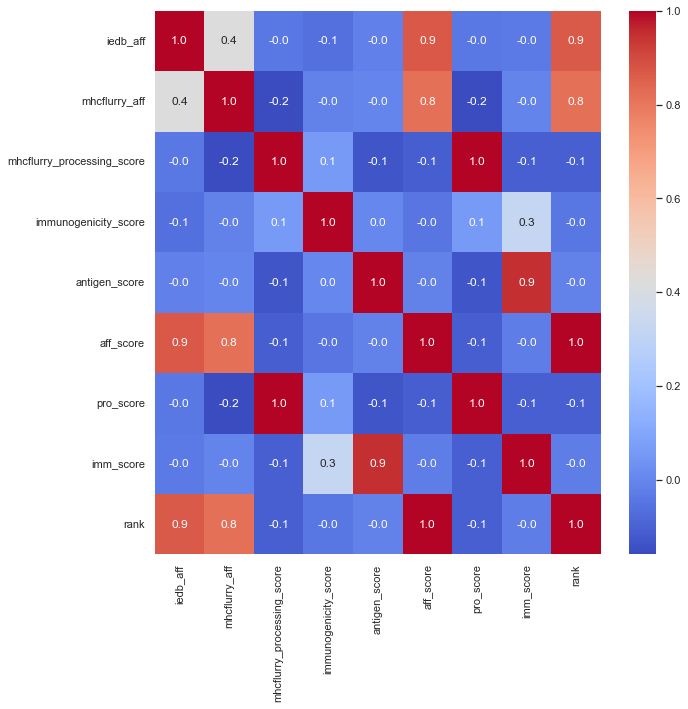

In [10]:
correlation = df[num_features].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

aff_score is heavily correlated to iedb_aff & mhcflurry_aff. pro_score is heavily correlated to mhcflurry_processing_score. imm_score is more related to antigen score rather than immunogenicity score. Even though rank is a combination of aff_score, pro_score & imm_score its heavily correlated to aff_score only 

<Figure size 720x576 with 0 Axes>

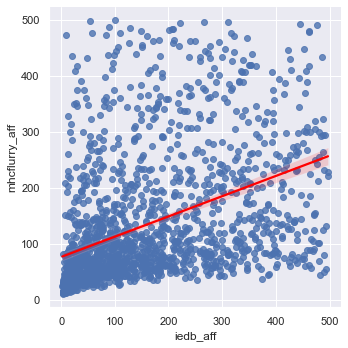

In [5]:
plt.figure(figsize = (10, 8))
sns.lmplot(data = df, x ='iedb_aff', y = 'mhcflurry_aff', line_kws={'color':'red'})

As both are affinity scores from different tools they should vary uniformly, but in this case we see that both scores are not proportional to each other

**Null Hypothesis (Ho)** : IEDB_aff & MHCFlurry_aff vary uniformly. **Alternate Hypothesis (Ha)**: IEDB_aff & MHCFlurry_aff  does not vary uniformly. **Level of significane(Alpha)** = 0.05

In [6]:
#Performing the H-test (Kruskal-Wallis test) to check whether the affinity scores from IEDB & MHCFlurry vary uniformly or not
kruskal(df['iedb_aff'], df['mhcflurry_aff'])

KruskalResult(statistic=4.9265391945790835, pvalue=0.02644723271018024)

As p<Alpha, Ho is rejected. That means IEDB_aff & MHCFlurry_aff  does not vary uniformly.

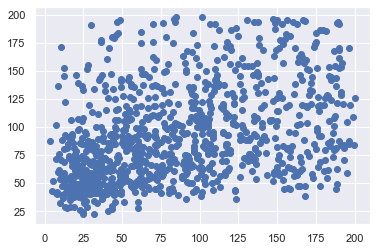

In [16]:
ia = df[df['iedb_aff']<=200]['iedb_aff'].values[:1000]
ma = df[df['mhcflurry_aff']<=200]['mhcflurry_aff'].values[:1000]
plt.scatter(ia, ma)

In [14]:
kruskal(ia, ma)

KruskalResult(statistic=20.8720245762441, pvalue=4.910136602027437e-06)

# Run the below cells for calculating difference between iedb_aff & mhcflurry_aff

In [5]:
df['diff_bw_iedb_aff_mhcflurry_aff'] = np.abs(df['iedb_aff'] - df['mhcflurry_aff'])
df.head()

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,...,probable_type,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Length_of_peptides,diff_bw_iedb_aff_mhcflurry_aff
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,...,ANTIGEN,483.928281,0.072916,0.568330,147.356275,NaN,NaN,NaN,9,13.836563
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,...,NON-ANTIGEN,470.400594,0.108789,0.082300,143.155747,NaN,NaN,NaN,10,17.581188
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,...,NON-ANTIGEN,469.095955,0.039136,0.322850,142.829555,NaN,NaN,NaN,9,46.691910
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,...,NON-ANTIGEN,460.323932,0.300376,0.145160,142.170765,NaN,NaN,NaN,9,52.512137
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,...,NON-ANTIGEN,469.770542,0.412814,-0.116125,141.937607,NaN,NaN,NaN,8,15.301085


In [10]:
df.describe()

,Unnamed: 0,iedb_aff,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,immunogenicity_score,antigen_score,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Length_of_peptides,diff_bw_iedb_aff_mhcflurry_aff
count,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,7.0,176.000000,0.0,1691.000000,1691.000000
mean,845.000000,154.358687,132.330429,0.250661,2.730337,0.025172,0.451642,143.344558,0.250661,0.238407,45.830293,1.0,0.824946,NaN,9.483737,96.334649
std,488.293969,133.739505,114.236277,0.236486,1.455663,0.191082,0.561800,104.709419,0.236486,0.296719,31.161886,0.0,0.226930,NaN,0.679498,95.998908
min,0.000000,2.390000,11.143925,0.000512,1.000000,-0.716840,-1.627600,6.961962,0.000512,-0.890760,5.536100,1.0,0.000000,NaN,8.000000,0.008591
25%,422.500000,40.765000,50.123829,0.051949,2.000000,-0.094340,0.075100,54.198767,0.051949,0.034970,19.584061,1.0,0.689655,NaN,9.000000,21.790984
50%,845.000000,110.210000,87.162907,0.173139,2.000000,0.040530,0.470200,115.224697,0.173139,0.244610,37.271557,1.0,0.938416,NaN,9.000000,60.494251
75%,1267.500000,241.890000,181.239777,0.390639,3.000000,0.151790,0.800900,216.978154,0.390639,0.417180,67.704185,1.0,1.000000,NaN,10.000000,148.522571
max,1690.000000,497.100000,498.519806,0.965711,7.000000,0.608420,2.692700,483.928281,0.965711,1.394400,147.356275,1.0,1.000000,NaN,11.000000,463.046517


<AxesSubplot:xlabel='diff_bw_iedb_aff_mhcflurry_aff', ylabel='Count'>

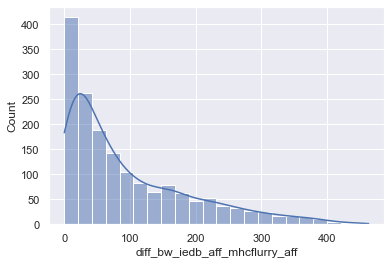

In [16]:
sns.histplot(x = 'diff_bw_iedb_aff_mhcflurry_aff', data = df, kde = 'True')

# Run the below cells to calculate the quantile range of the differences

In [6]:
def labelquartile(diff):
    if diff <= np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.25):
        return 'Less than 25%'
    elif diff > np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.25) and diff <=  np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.5):
        return 'Less than 50%'
    elif diff > np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.5) and diff <= np.quantile(df['diff_bw_iedb_aff_mhcflurry_aff'], 0.75):
        return 'Less than 75%'
    else:
        return 'Greater than 75%'

In [7]:
df['Quantile'] = df['diff_bw_iedb_aff_mhcflurry_aff'].apply(labelquartile)
df.head()

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,...,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Length_of_peptides,diff_bw_iedb_aff_mhcflurry_aff,Quantile
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,...,483.928281,0.072916,0.568330,147.356275,NaN,NaN,NaN,9,13.836563,Less than 25%
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,...,470.400594,0.108789,0.082300,143.155747,NaN,NaN,NaN,10,17.581188,Less than 25%
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,...,469.095955,0.039136,0.322850,142.829555,NaN,NaN,NaN,9,46.691910,Less than 50%
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,...,460.323932,0.300376,0.145160,142.170765,NaN,NaN,NaN,9,52.512137,Less than 50%
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,...,469.770542,0.412814,-0.116125,141.937607,NaN,NaN,NaN,8,15.301085,Less than 25%


<AxesSubplot:xlabel='iedb_aff', ylabel='mhcflurry_aff'>

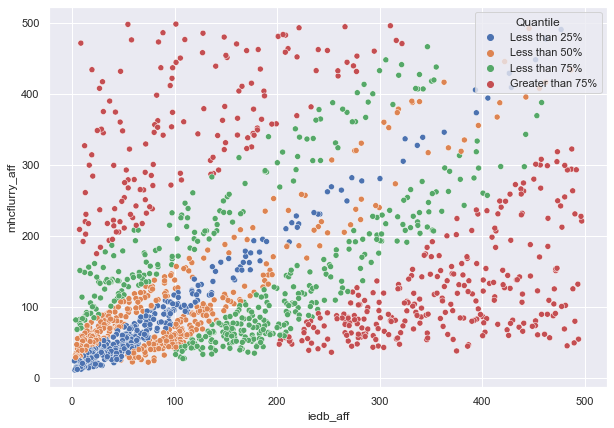

In [6]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'iedb_aff', y = 'mhcflurry_aff', hue = 'Quantile')

For difference below 3rd quantile(75% of values below 150), the iedb_aff & mhcflurry_aff are linearly proprotional to each other.

<AxesSubplot:ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

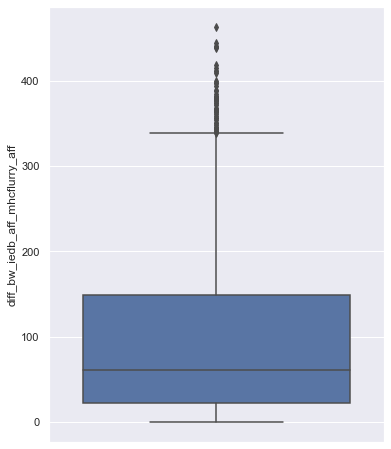

In [9]:
plt.figure(figsize = (6, 8))
sns.boxplot(data = df1, y = 'diff_bw_iedb_aff_mhcflurry_aff')

75% of the absolute difference values are below 150

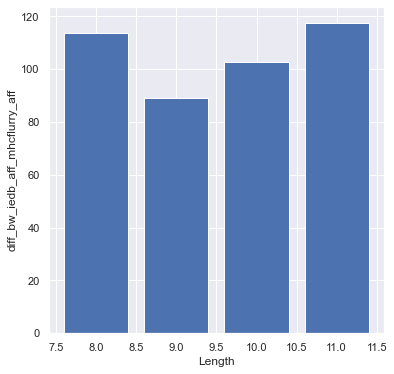

In [37]:
plt.figure(figsize = (6, 6))
dl = df.groupby('Length_of_peptides')['diff_bw_iedb_aff_mhcflurry_aff'].mean()
plt.bar(dl.index, dl.values)
plt.xlabel('Length')
plt.ylabel('diff_bw_iedb_aff_mhcflurry_aff')
plt.show()

Peptides of length 9 have minimum difference as compared to others

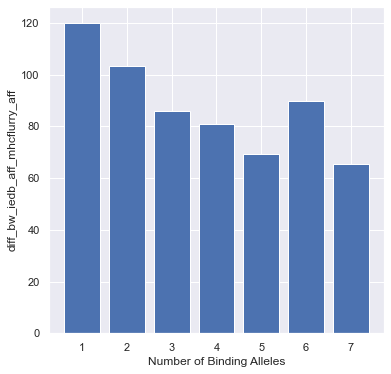

In [40]:
plt.figure(figsize = (6, 6))
dba = df.groupby('Number of Binding Alleles')['diff_bw_iedb_aff_mhcflurry_aff'].mean()
plt.bar(dba.index, dba.values)
plt.xlabel('Number of Binding Alleles')
plt.ylabel('diff_bw_iedb_aff_mhcflurry_aff')
plt.show()

Peptides that bind to 7 alleles have minimum difference. But there's no specific pattern. We see that initially the difference decreases for increase in number of binding alleles except for 6 where it's increased.

<AxesSubplot:xlabel='protein_id', ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

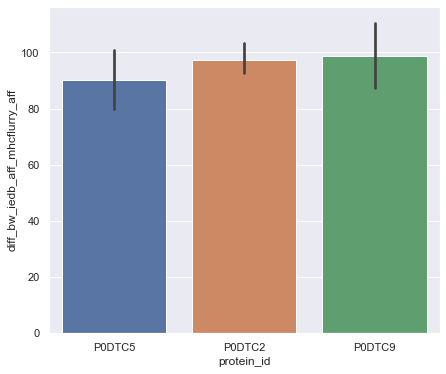

In [25]:
plt.figure(figsize = (7, 6))
sns.barplot(data = df, y = 'diff_bw_iedb_aff_mhcflurry_aff', x = 'protein_id')

P0DTC5 has lower difference between the affinity scores

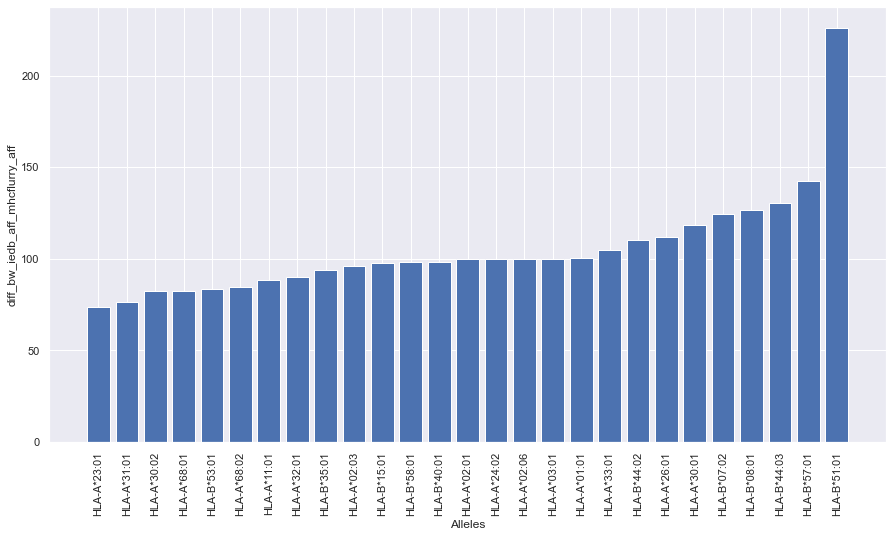

In [31]:
plt.figure(figsize = (15, 8))
ada = df.groupby('allele')['diff_bw_iedb_aff_mhcflurry_aff'].mean().sort_values(ascending = True)
plt.bar(ada.index, ada.values)
plt.xticks(rotation = 90)
plt.xlabel('Alleles')
plt.ylabel('diff_bw_iedb_aff_mhcflurry_aff')
plt.show()


HLA-A*23:01 has minimum difference while HLA-B*51:01 has the maximum difference

In [ ]:
plt.figure(figsize = (7, 6))
sns.boxplot(data = df, y = 'diff_bw_iedb_aff_mhcflurry_aff', x = 'protein_id')

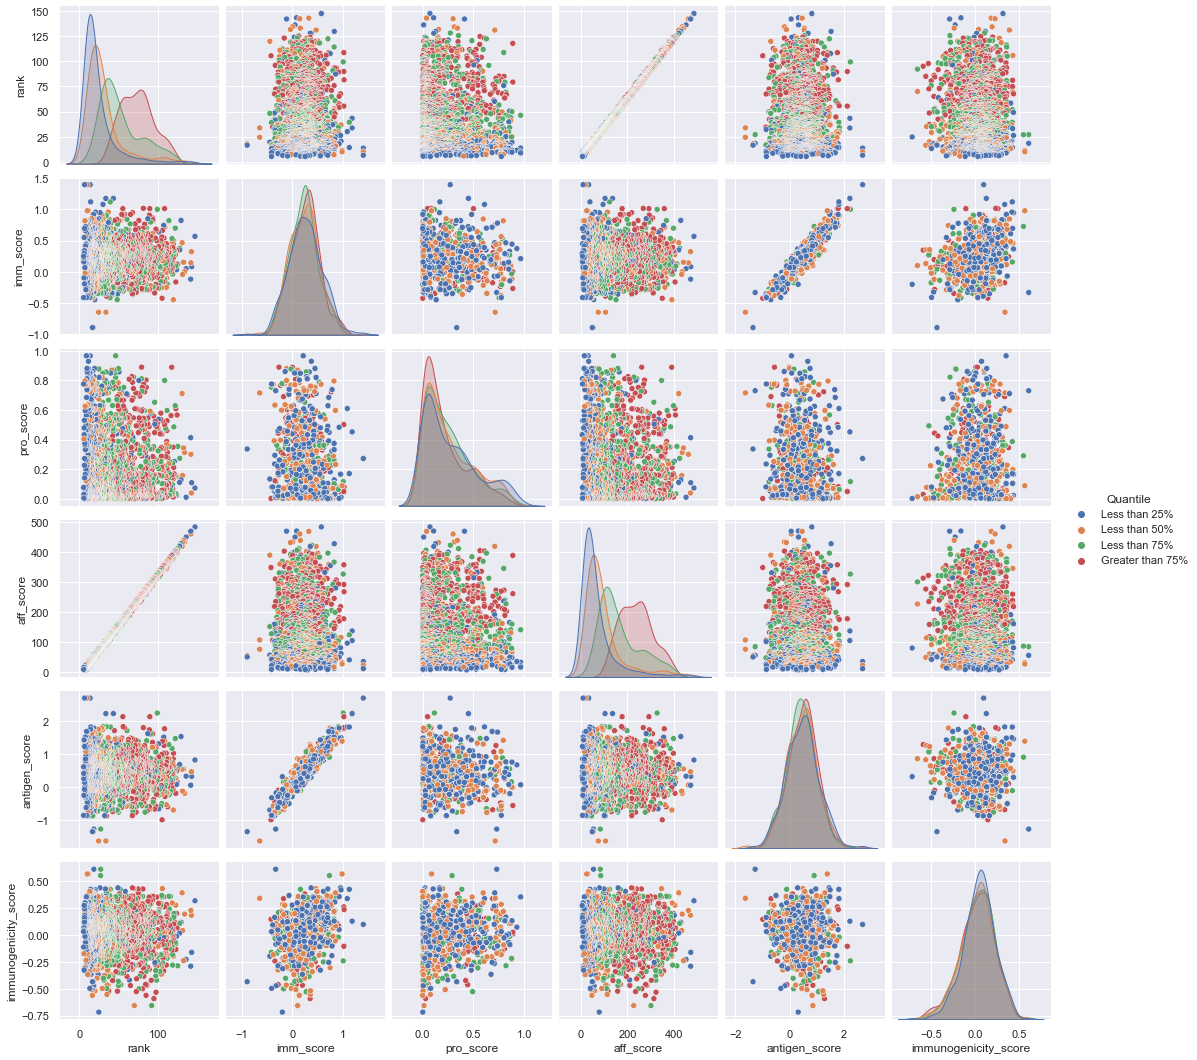

In [14]:
numerical_cols = ['rank','imm_score','pro_score', 'aff_score', 'antigen_score', 'immunogenicity_score']
sns.pairplot(df,vars=numerical_cols, hue='Quantile')
plt.show()

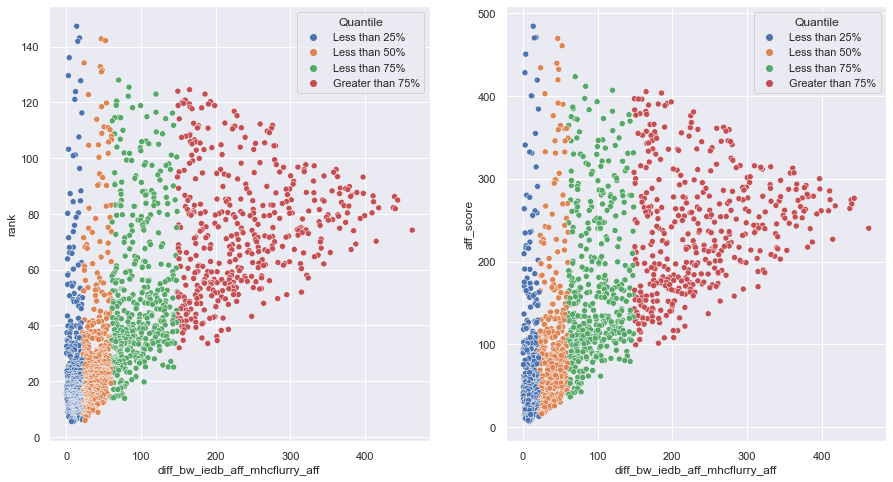

In [43]:
numerical_cols = ['rank', 'aff_score']

fig, axes = plt.subplots(1,2, figsize = (15, 8)) 

for param, ax in zip(numerical_cols, axes.flatten()):
    sns.scatterplot(data=df, x='diff_bw_iedb_aff_mhcflurry_aff', y=param, ax = ax, hue = 'Quantile')

As the difference increases we can see that the rank & aff_score are converging

In [21]:
def plot_alleles_as_per_quantile(df, quantile):
    plt.figure(figsize = (10, 7))
    df = df[df['Quantile'] == quantile]
    ada = df.groupby('allele')['diff_bw_iedb_aff_mhcflurry_aff'].mean().sort_values(ascending = False)[:10]
    plt.bar(ada.index, ada.values)
    plt.xticks(rotation = 90)
    plt.xlabel('Alleles')
    plt.ylabel('diff_bw_iedb_aff_mhcflurry_aff')
    plt.title(f'Affinity scores difference for alleles {quantile}')
    plt.show()

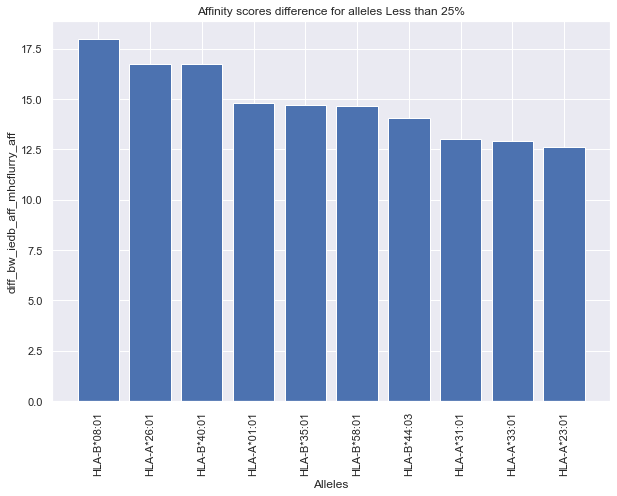

In [22]:
plot_alleles_as_per_quantile(df, 'Less than 25%')

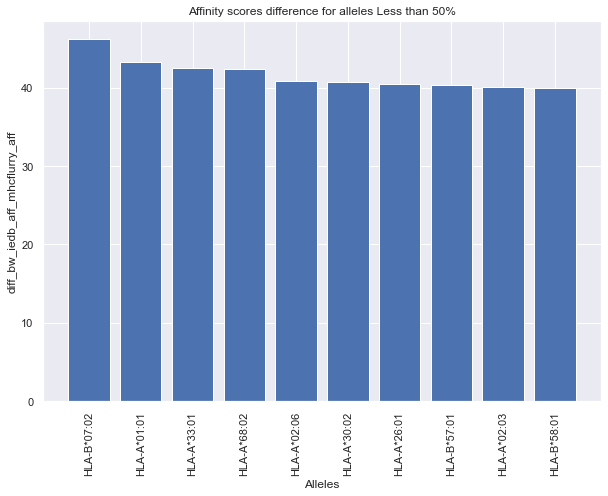

In [23]:
plot_alleles_as_per_quantile(df, 'Less than 50%')

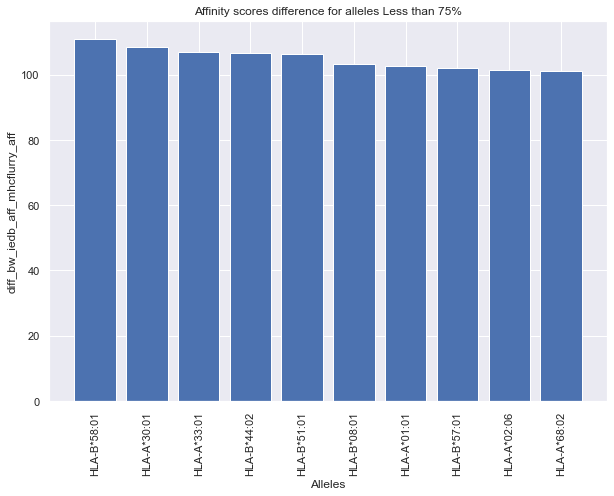

In [24]:
plot_alleles_as_per_quantile(df, 'Less than 75%')

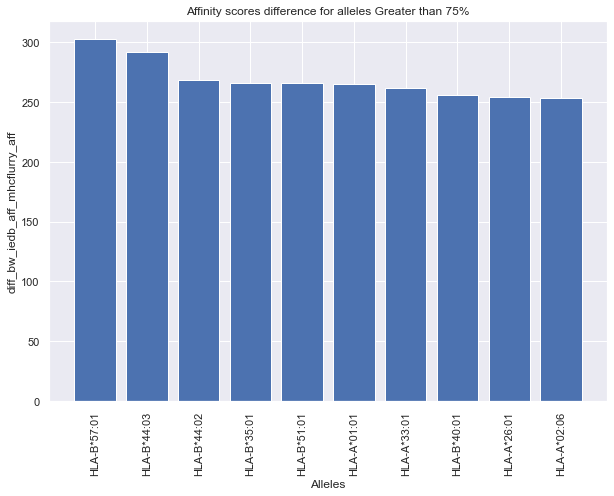

In [25]:
plot_alleles_as_per_quantile(df, 'Greater than 75%')

# Open the eptiopes file provided by Belyntic & integrate it in our dataset

In [3]:
dfsm = pd.read_csv('HLA_I_SM_epitopes.csv')
dfsm

,HLA-I
0,YLQPRTFLL
1,KIADYNYKL
2,FQFCNDPFL
3,SIIAYTMSL
4,VLNDILSRL
5,LTDEMIAQY
6,WTAGAAAYY
7,NYNYLYRLF
8,QYIKWPWYI
9,IPFAMQMAY


In [4]:
dfsnm = pd.read_csv('HLA_I_SNM_epitopes.csv')
dfsnm

,HLA-I
0,YQPYRVVVL
1,FVFLVLLPL
2,CVADYSVLY
3,QPTESIVRF
4,AEVQIDRLI
5,QSAPHGVVF
6,VYYPDKVFR
7,RRARSVASQ
8,CPFGEVFNA
9,SAPHGVVFL


In [5]:
peptides_SM = dfsm['HLA-I'].values
peptides_SNM = dfsnm['HLA-I'].values

peptides_provided = []

for i in range(len(peptides_SM)):
    peptides_provided.append(peptides_SM[i])
    
for i in range(len(peptides_SNM)):
    peptides_provided.append(peptides_SNM[i])
    
peptides_provided

['YLQPRTFLL',
 'KIADYNYKL',
 'FQFCNDPFL',
 'SIIAYTMSL',
 'VLNDILSRL',
 'LTDEMIAQY',
 'WTAGAAAYY',
 'NYNYLYRLF',
 'QYIKWPWYI',
 'IPFAMQMAY',
 'LPFNDGVYF',
 'VASQSIIAY',
 'FAMQMAYRF',
 'LGAENSVAY',
 'GLMWLSYFI',
 'FVLAAVYRI',
 'KLLEQWNLV',
 'ATSRTLSYY',
 'YFIASFRLF',
 'SYFIASFRL',
 'YANRNRFLY',
 'VATSRTLSY',
 'FAYANRNRF',
 'YQPYRVVVL',
 'FVFLVLLPL',
 'CVADYSVLY',
 'QPTESIVRF',
 'AEVQIDRLI',
 'QSAPHGVVF',
 'VYYPDKVFR',
 'RRARSVASQ',
 'CPFGEVFNA',
 'SAPHGVVFL',
 'FNPETNILL',
 'SSSDNIALL',
 'KLLEQWNLV',
 'LWLLWPVTL',
 'SELVIGAVI',
 'ATSRTLSYY',
 'LPKEITVAT',
 'EQWNLVIGF',
 'FVLAAVYR',
 'SELVIGAV',
 'FAPSASAF',
 'LLLDRLNQL',
 'SSPDDQIGY',
 'TPSGTWLTY',
 'MEVTPSGTW',
 'KHWPQIAQF',
 'ASAFFGMSR',
 'DAALALLLL',
 'RQKKQQTV',
 'SRIGMEVTP']

In [17]:
len(peptides_provided)

53

In [6]:
def peptides_B(peptide_seq):
        if peptide_seq in peptides_provided:
            return "Yes"
        return "No"
            

In [7]:
df['Peptide_Belyntic'] = df['peptide'].apply(peptides_B)
df.head()

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,antigen_score,probable_type,aff_score,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Peptide_Belyntic
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,0.8209,ANTIGEN,483.928281,0.072916,0.568330,147.356275,NaN,NaN,NaN,No
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,0.3271,NON-ANTIGEN,470.400594,0.108789,0.082300,143.155747,NaN,NaN,NaN,No
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,0.4642,NON-ANTIGEN,469.095955,0.039136,0.322850,142.829555,NaN,NaN,NaN,No
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,0.0646,NON-ANTIGEN,460.323932,0.300376,0.145160,142.170765,NaN,NaN,NaN,No
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,0.0589,NON-ANTIGEN,469.770542,0.412814,-0.116125,141.937607,NaN,NaN,NaN,No


<AxesSubplot:xlabel='Peptide_Belyntic', ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

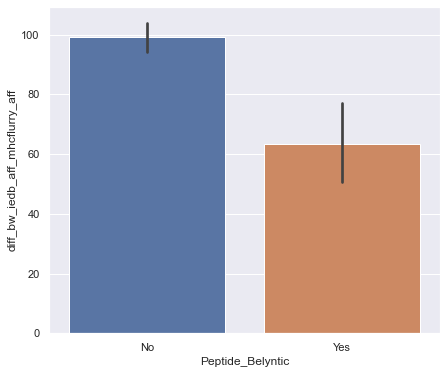

In [18]:
plt.figure(figsize = (7, 6))
sns.barplot(data = df, y = 'diff_bw_iedb_aff_mhcflurry_aff', x = 'Peptide_Belyntic')

Peptides provided from Belyntic has lower difference

Text(0.5, 1.0, 'iedb_aff vs mhcflurry_aff for peptides provided by Belyntic')

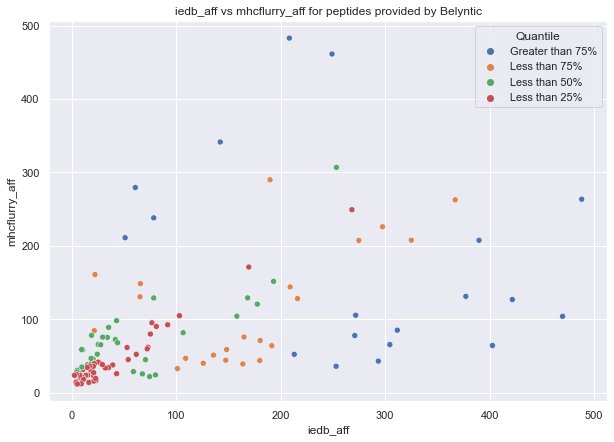

In [20]:
plt.figure(figsize = (10, 7))
dfp = df[df['Peptide_Belyntic'] == 'Yes']
sns.scatterplot(data = dfp, x = 'iedb_aff', y = 'mhcflurry_aff', hue = 'Quantile')
plt.title('iedb_aff vs mhcflurry_aff for peptides provided by Belyntic')

The ideal condition is for values less than 25% quantile

In [8]:
def get_source(peptide):
    if peptide in peptides_SM:
        return 'SM'
    else:
        return 'SNM'

In [22]:
dfp['Source'] = dfp['peptide'].apply(get_source)
dfp.head()

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,...,pro_score,imm_score,rank,bcell_assays,tcell_assays,mch_assays,Peptide_Belyntic,diff_bw_iedb_aff_mhcflurry_aff,Quantile,Source
40,40,HLA-B*58:01,VASQSIIAY,488.27,P0DTC2,263.604032,0.562197,4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.07090,...,0.562197,0.032850,116.847180,NaN,NaN,NaN,Yes,224.665968,Greater than 75%,SM
53,53,HLA-B*53:01,YANRNRFLY,249.09,P0DTC5,461.301717,0.278745,6,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.18472,...,0.278745,0.105160,112.618180,NaN,NaN,NaN,Yes,212.211717,Greater than 75%,SM
66,66,HLA-B*15:01,FAMQMAYRF,208.25,P0DTC2,482.968028,0.092380,7,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.28061,...,0.092380,0.373595,110.804021,NaN,NaN,NaN,Yes,274.718028,Greater than 75%,SM
134,134,HLA-A*30:02,LGAENSVAY,367.13,P0DTC2,262.743121,0.140594,3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.00912,...,0.140594,0.213210,97.558991,NaN,NaN,NaN,Yes,104.386879,Less than 75%,SM
153,153,HLA-A*30:01,ASAFFGMSR,389.90,P0DTC9,207.716326,0.117961,5,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,0.03154,...,0.117961,0.173420,94.706271,NaN,NaN,NaN,Yes,182.183674,Greater than 75%,SNM


Text(0.5, 1.0, 'iedb_aff vs mhcflurry_aff for peptides provided by Belyntic')

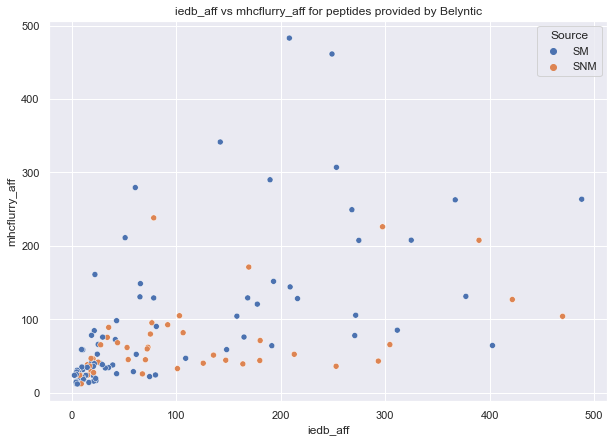

In [23]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = dfp, x = 'iedb_aff', y = 'mhcflurry_aff', hue = 'Source')
plt.title('iedb_aff vs mhcflurry_aff for peptides provided by Belyntic')

<AxesSubplot:xlabel='Source', ylabel='diff_bw_iedb_aff_mhcflurry_aff'>

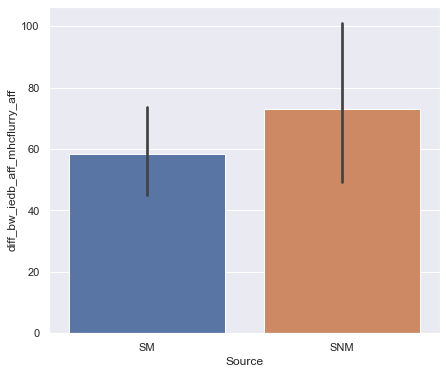

In [24]:
plt.figure(figsize = (7, 6))
sns.barplot(data = dfp, y = 'diff_bw_iedb_aff_mhcflurry_aff', x = 'Source')

SM peptides provided from Belyntic have lower difference

<AxesSubplot:xlabel='probable_type', ylabel='antigen_score'>

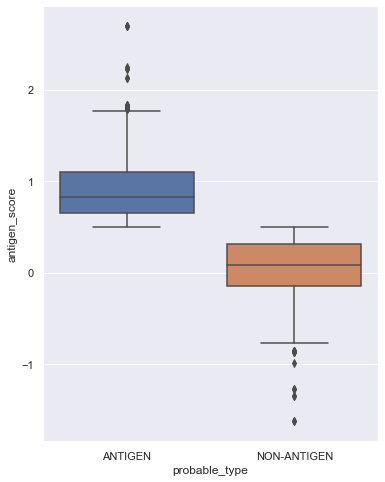

In [19]:
plt.figure(figsize = (6, 8))
sns.boxplot(data = df, x = 'probable_type', y = 'antigen_score')

Antigen score below 0.5 is considered to be non-antigen

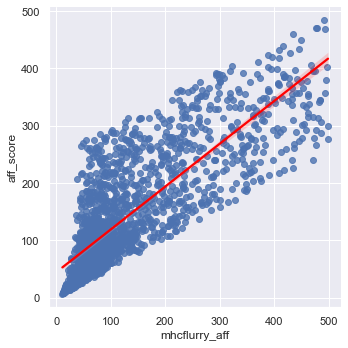

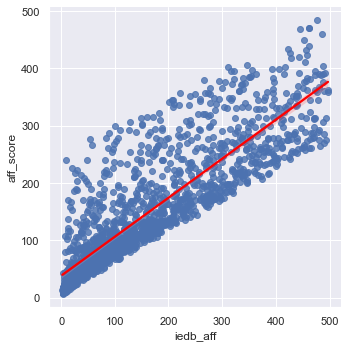

In [6]:
sns.lmplot(data = df, x = 'mhcflurry_aff', y = 'aff_score', line_kws={'color':'red'})
sns.lmplot(data = df, x ='iedb_aff', y = 'aff_score', line_kws={'color':'red'})

We can see a linear relationship since aff_score is a linear combination of iedb_aff & mhcflurry_aff

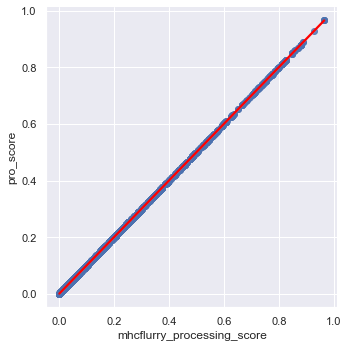

In [7]:
sns.lmplot(data = df, x = 'mhcflurry_processing_score', y = 'pro_score',  line_kws={'color':'red'})

The pro_score & mhc_processing_score are perfectly linear

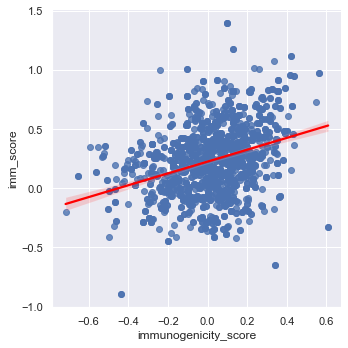

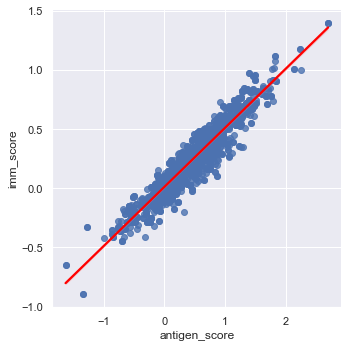

In [8]:
sns.lmplot(data = df, x = 'immunogenicity_score', y = 'imm_score',  line_kws={'color':'red'})
sns.lmplot(data = df, x ='antigen_score', y = 'imm_score',  line_kws={'color':'red'})

The imm_score is a linear combination of antigen_score & imunogenicity_score. The imm_score varies more linearly to the antigen_score rather than immunogenicity_score even though both have same weights

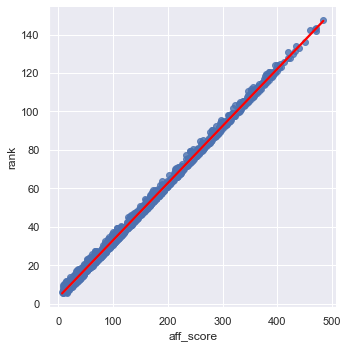

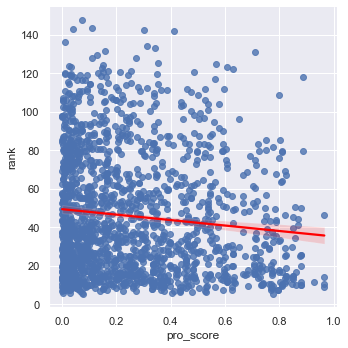

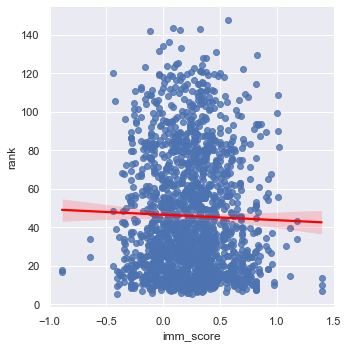

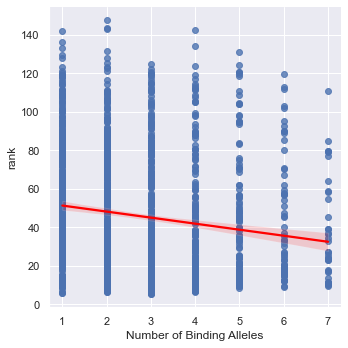

In [9]:
sns.lmplot(data = df, x = 'aff_score', y = 'rank',  line_kws={'color':'red'})
sns.lmplot(data = df, x ='pro_score', y = 'rank',  line_kws={'color':'red'})
sns.lmplot(data = df, x ='imm_score', y = 'rank',  line_kws={'color':'red'})
sns.lmplot(data = df, x ='Number of Binding Alleles', y = 'rank',  line_kws={'color':'red'})

Even though rank is a linear combination of aff_score, pro_score, imm_score & number of binding_alleles it only varies more linearly to the aff_score

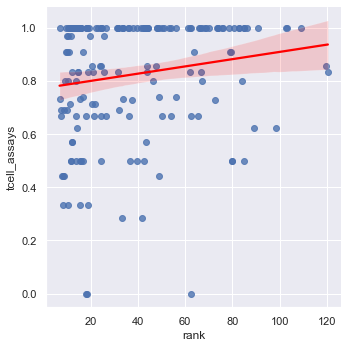

In [10]:
sns.lmplot(data = df, x = 'rank', y = 'tcell_assays',  line_kws={'color':'red'})

The tcell_assays should be proportional to the rank obtained which is not in this case

In [33]:
def top10_peptides_alleles_barGraph(parameter):
    af = df.groupby(['peptide', 'allele'])[parameter].mean().sort_values(ascending = False)[:10]
    li = []
    for i in range(len(af)):
        c = ' :: '.join(af.index[i])
        li.append(c)
    plt.figure(figsize=(10, 6))
    sns.barplot(li, af.values[:10])
    plt.title(f'Top 10 Peptides-Alleles with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()
    


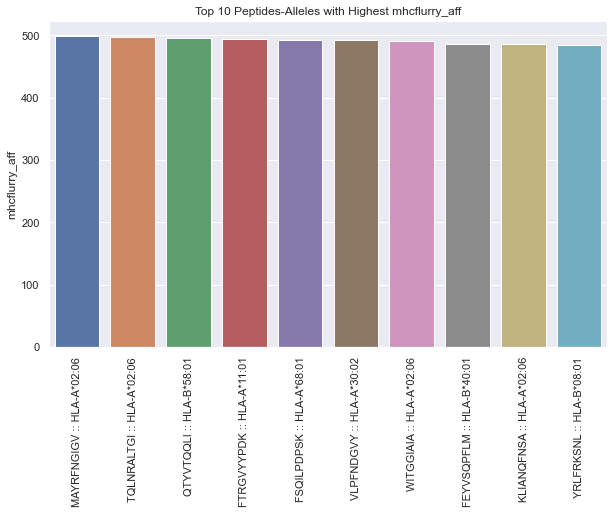

In [34]:
top10_peptides_alleles_barGraph('mhcflurry_aff')

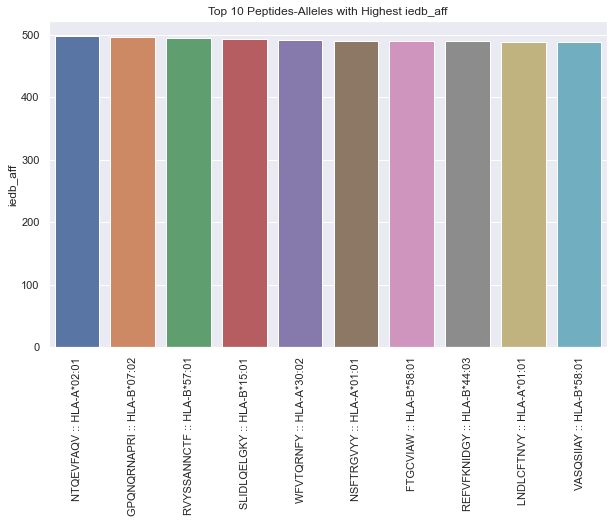

In [35]:
top10_peptides_alleles_barGraph('iedb_aff')

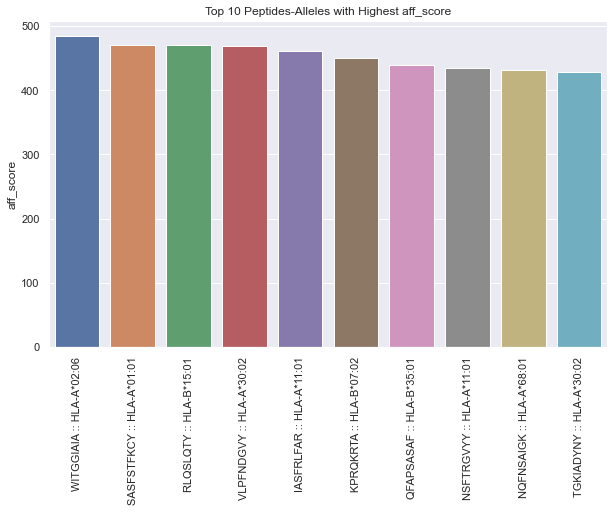

In [36]:
top10_peptides_alleles_barGraph('aff_score')

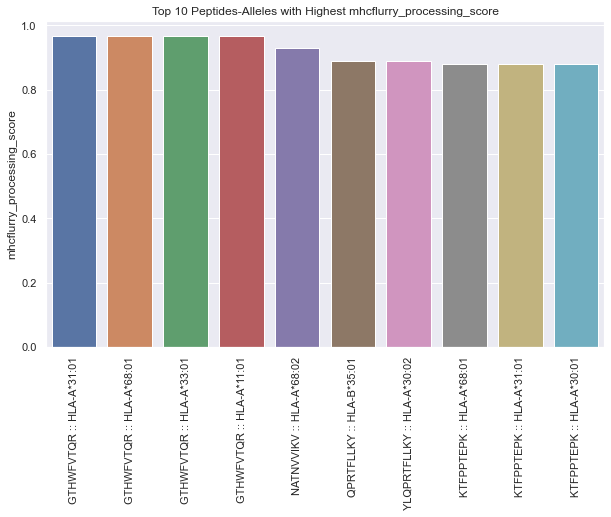

In [37]:
top10_peptides_alleles_barGraph('mhcflurry_processing_score')

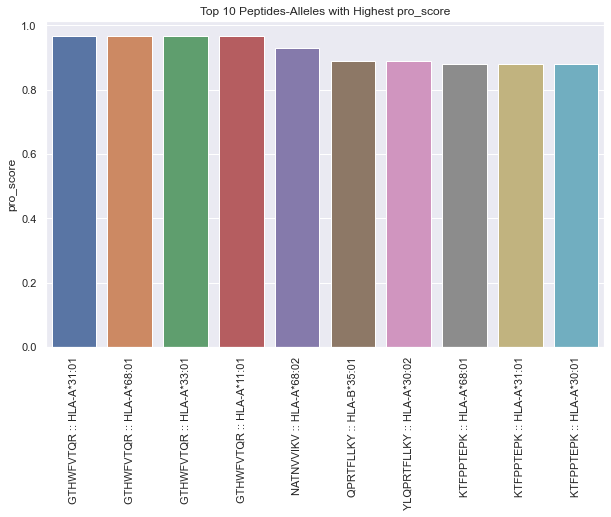

In [38]:
top10_peptides_alleles_barGraph('pro_score')

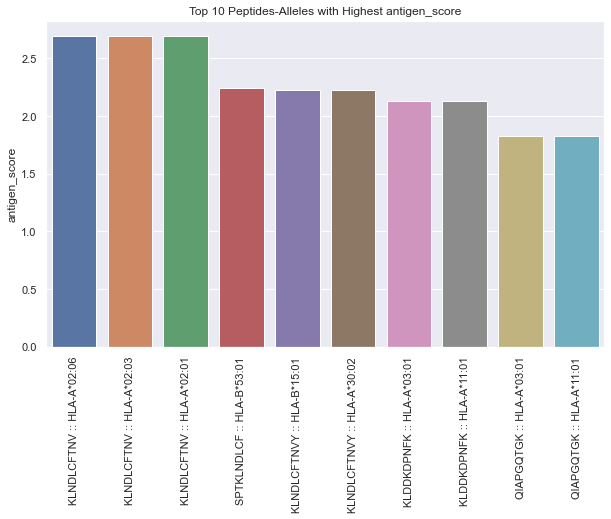

In [39]:
top10_peptides_alleles_barGraph('antigen_score')

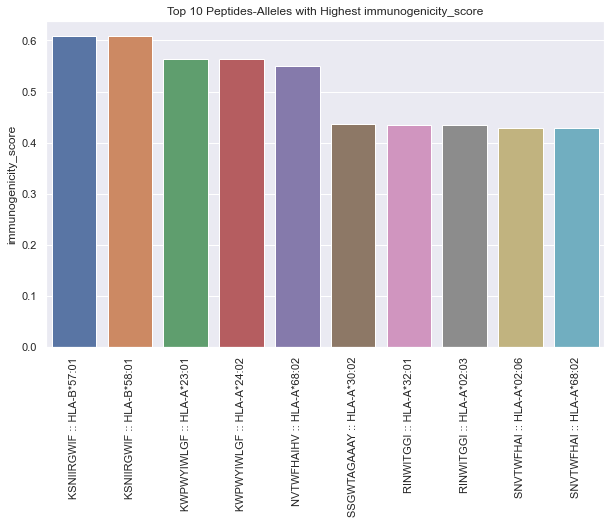

In [40]:
top10_peptides_alleles_barGraph('immunogenicity_score')

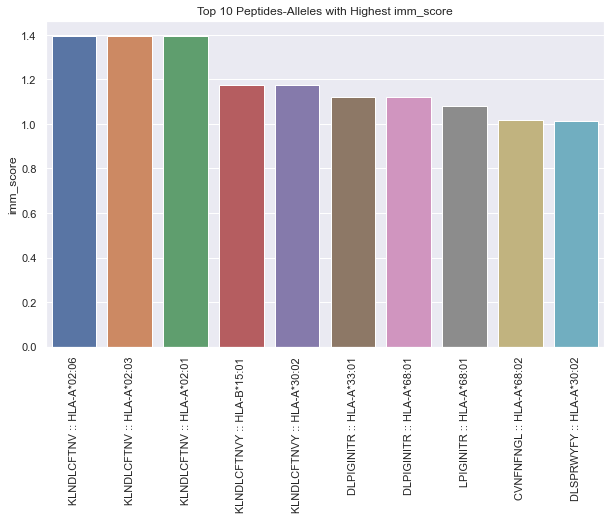

In [41]:
top10_peptides_alleles_barGraph('imm_score')

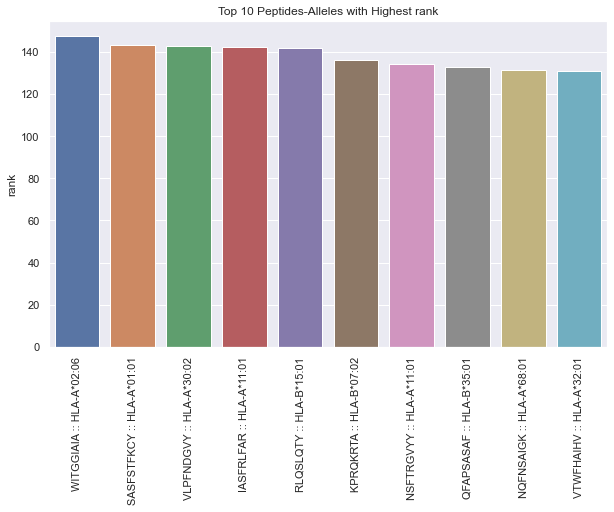

In [42]:
top10_peptides_alleles_barGraph('rank')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

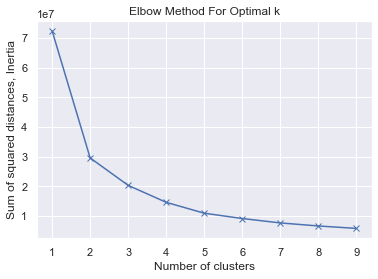

In [11]:
calc_features = ['iedb_aff', 'mhcflurry_aff', 'mhcflurry_processing_score', 'immunogenicity_score', 'antigen_score',
                 'Number of Binding Alleles',   'aff_score', 'pro_score', 'imm_score', 'rank']

costs = []
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[calc_features])
    costs.append(kmeans.inertia_)
    
plt.plot(ks, costs,'bx-')
plt.xlabel('Number of clusters') 
plt.ylabel('Sum of squared distances, Inertia') 
plt.title('Elbow Method For Optimal k')

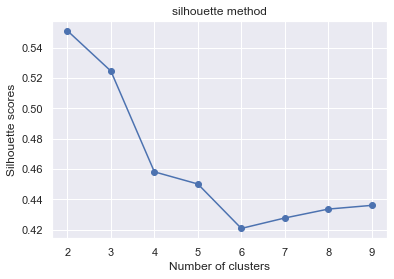

In [16]:
silhouette_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters = k)
    km.fit(df[calc_features])
    score = silhouette_score(df[calc_features], km.labels_)
    silhouette_scores.append(score)
    
k_range = range(2, 10)
plt.plot(k_range, silhouette_scores, marker = 'o' )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')
plt.title('silhouette method')
plt.show()

As we can see that the max silhouette score occurs at 2

<AxesSubplot:xlabel='allele', ylabel='peptide'>

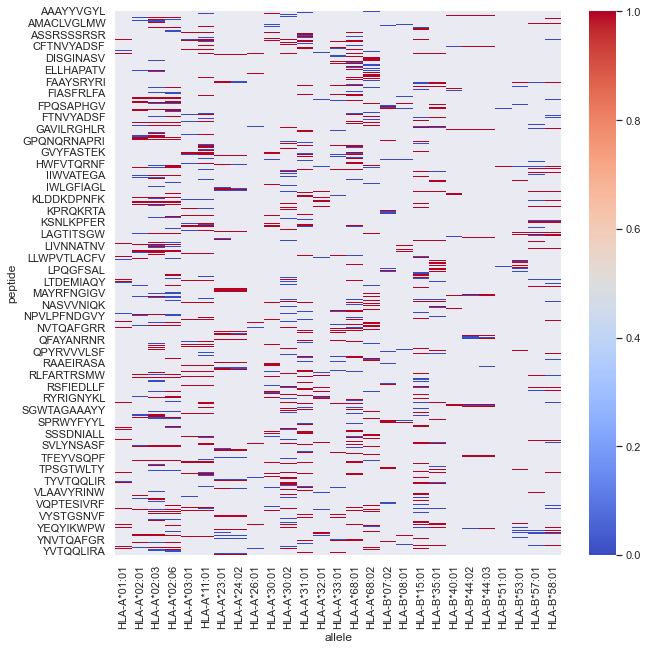

In [13]:
X = df[calc_features]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# add the cluster labels
X['Cluster'] = kmeans.labels_
#visualizing
X['peptide'] = df['peptide']
X['allele'] = df['allele']
pivot_table = X.pivot_table(index='peptide', columns='allele', values='Cluster')

# create a heatmap using the pivot table and color-coding the clusters
plt.figure(figsize = (10, 10))
sns.heatmap(pivot_table, cmap='coolwarm')

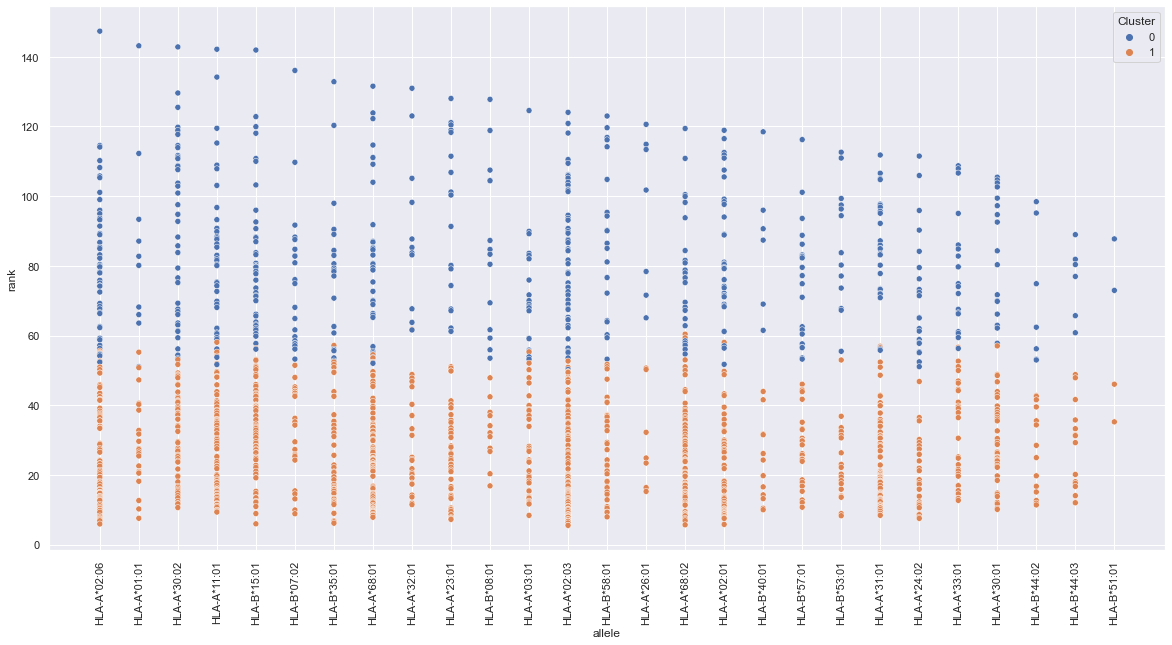

In [15]:
#additional visualization:

plt.figure(figsize = (20, 10))
sns.scatterplot(x=X['allele'], y=X['rank'], hue=X['Cluster'])
plt.xticks(rotation=90)
plt.show()

From these two visualisations we see that peptides-alleles in cluster 0 (blue) have higher rank than those in cluster 1 (orange).

In [19]:
X.head()

,iedb_aff,mhcflurry_aff,mhcflurry_processing_score,immunogenicity_score,antigen_score,Number of Binding Alleles,aff_score,pro_score,imm_score,rank,Cluster,peptide,allele
0,477.01,490.846563,0.072916,0.31576,0.8209,2,483.928281,0.072916,0.568330,147.356275,0,WITGGIAIA,HLA-A*02:06
1,461.61,479.191188,0.108789,-0.16250,0.3271,2,470.400594,0.108789,0.082300,143.155747,0,SASFSTFKCY,HLA-A*01:01
2,445.75,492.441910,0.039136,0.18150,0.4642,2,469.095955,0.039136,0.322850,142.829555,0,VLPFNDGVY,HLA-A*30:02
3,486.58,434.067863,0.300376,0.22572,0.0646,4,460.323932,0.300376,0.145160,142.170765,0,IASFRLFAR,HLA-A*11:01
4,462.12,477.421085,0.412814,-0.29115,0.0589,1,469.770542,0.412814,-0.116125,141.937607,0,RLQSLQTY,HLA-B*15:01


<AxesSubplot:xlabel='Cluster', ylabel='rank'>

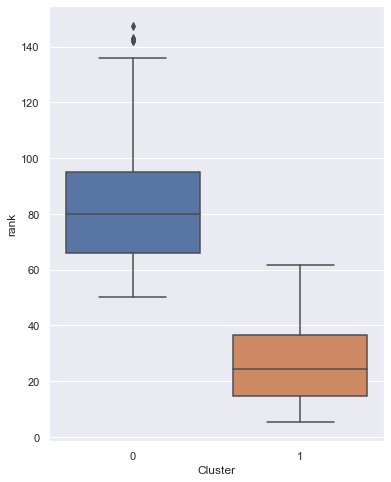

In [29]:
plt.figure(figsize = (6, 8))
sns.boxplot(data = X, x = 'Cluster', y = 'rank')

In [8]:
def add_letters_count(dataframe):
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for char in letters:
        dataframe[char] = dataframe['peptide'].str.count(char)
    return dataframe

In [9]:
df = add_letters_count(df)
df.head()

,Unnamed: 0,allele,peptide,iedb_aff,protein_id,mhcflurry_aff,mhcflurry_processing_score,Number of Binding Alleles,protein_sequence,immunogenicity_score,...,Q,R,S,T,U,V,W,X,Y,Z
0,0,HLA-A*02:06,WITGGIAIA,477.01,P0DTC5,490.846563,0.072916,2,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.31576,...,0,0,0,1,0,0,1,0,0,0
1,1,HLA-A*01:01,SASFSTFKCY,461.61,P0DTC2,479.191188,0.108789,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.16250,...,0,0,3,1,0,0,0,0,1,0
2,2,HLA-A*30:02,VLPFNDGVY,445.75,P0DTC2,492.441910,0.039136,2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,0.18150,...,0,0,0,0,0,2,0,0,1,0
3,3,HLA-A*11:01,IASFRLFAR,486.58,P0DTC5,434.067863,0.300376,4,MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFL...,0.22572,...,0,2,1,0,0,0,0,0,0,0
4,4,HLA-B*15:01,RLQSLQTY,462.12,P0DTC2,477.421085,0.412814,1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,-0.29115,...,2,1,1,1,0,0,0,0,1,0


In [13]:
features = df.loc[:, 'A':].columns
features

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

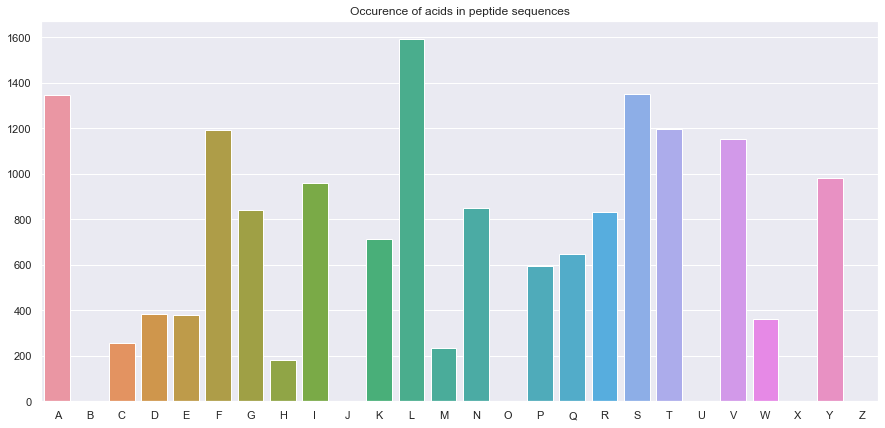

In [21]:
f = df[features].sum()
plt.figure(figsize = (15, 7))
sns.barplot(f.index, f.values)
plt.title('Occurence of acids in peptide sequences')
plt.show()

L, A, S, T, V are the most frequent amino acids in peptides. B, J, O, U, X, Z are absent as they are not amino acids

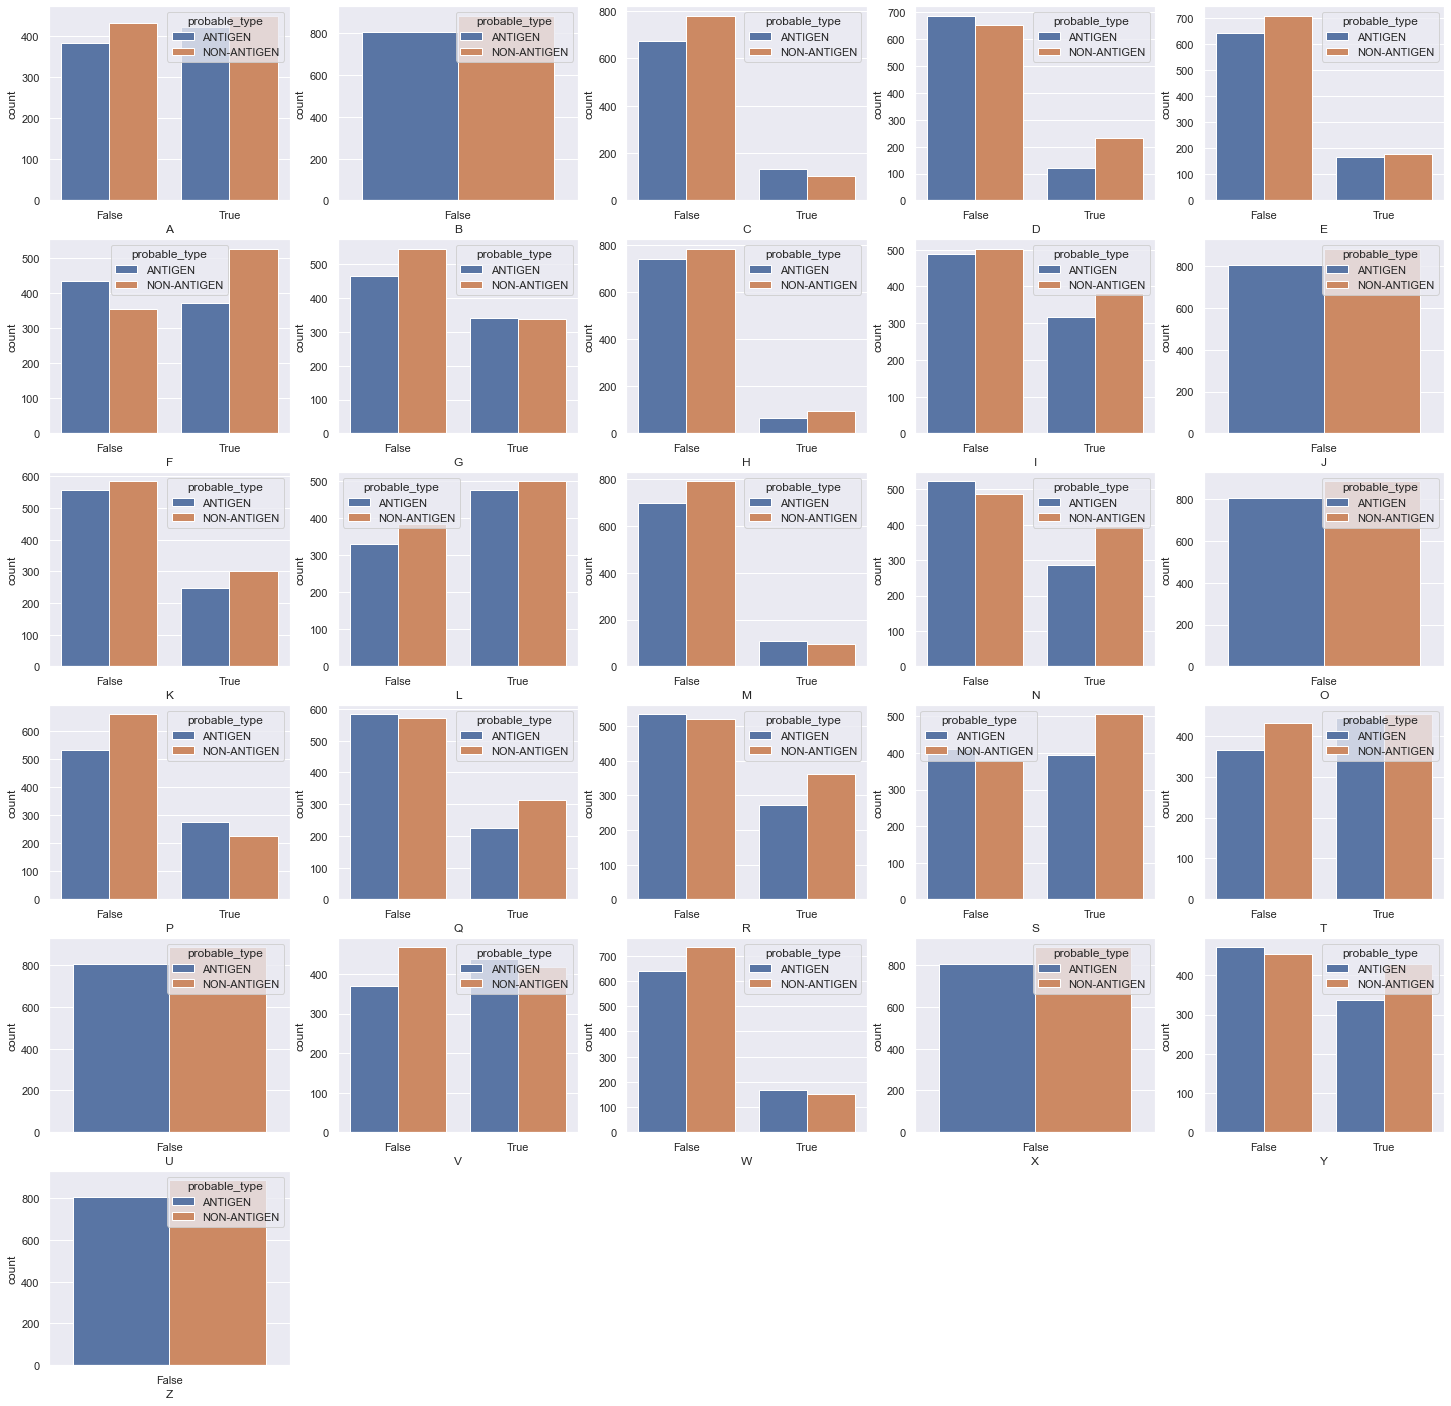

In [22]:
plt.figure(figsize = (25, 25))

for i in range(len(features)):
    plt.subplot(6,5, i+1)
    sns.countplot(x = df[features[i]]>0, hue = df['probable_type'])

**A**: almost equal probability for antigen & non-antigen

**C**: if C is absent then mostly its non-antigen

**D**: if D is present then mostly its non-antigen

**E**: if E is absent then mostly its non-antigen

**F**: if F is present then mostly its non-antigen

**H**: almost equal probability for antigen & non-antigen

**I**: if I is present then mostly its non-antigen

**K**: almost equal probability for antigen & non-antigen

**L**: almost equal probability for antigen & non-antigen

**M**: if M is absent then mostly its non-antigen

**N**: if N is present then mostly its non-antigen

**P**: if P is absent then mostly its non-antigen

**Q**: if Q is present then mostly its non-antigen

**R**: if R is present then mostly its non-antigen

**S**: if S is present then mostly its non-antigen

**T**: if T is absent then mostly its non-antigen

**V**: if V is absent then mostly its non-antigen

**W**: if W is absent then mostly its non-antigen

**Y**: if Y is present then mostly its non-antigen